# Feature Selection

In real-world datasets, it is fairly common to have columns that are nothing but noise. Modern day datasets are very rich in information with data collected from millions of IoT devices and sensors. This makes the data high dimensional and it is quite common to see datasets with hundreds of features and is not unusual to see it go to tens of thousands.

You are better off getting rid of such variables because of
- the memory space they occupy, the time and the computational resources it is going to cost, especially in large datasets.
- Models have increasing risk of overfitting with increasing number of features.

Sometimes, you have a variable that makes business sense, but you are not sure if it actually helps in predicting the Y. You also need to consider the fact that, a feature that could be useful in one ML algorithm (say a regression) may go underrepresented or unused by another (like a KNN model).

Having said that, it is still possible that a variable that shows poor signs of helping to explain the response variable (Y), can turn out to be significantly useful in the presence of (or combination with) other predictors. What I mean by that is, a variable might have a low correlation value of (~0.2) with Y. But in the presence of other variables, it can help to explain certain patterns/phenomenon that other variables can’t explain.

In such cases, it can be hard to make a call whether to include or exclude such variables.

The strategies we are about to discuss can help fix such problems. Not only that, it will also help understand if a particular variable is important or not and how much it is contributing to the model

## Univariate Selection

Filter Methods considers the relationship between features and the target variable to compute the importance of features.

Scikit learn provides the Selecting K best features using F-Test.

    - Regression Tasks (sklearn.feature_selection.f_regression)
    - Classification Tasks (sklearn.feature_selection.f_classif)

#### Drawbacks of using F-Test to select your features. 
F-Test checks for and only captures linear relationships between features and labels. A highly correlated feature is given higher score and less correlated features are given lower score.

Correlation is highly deceptive as it doesn’t capture strong non-linear relationships.

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:

data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

### Mutual Information

Mutual Information between two variables measures the dependence of one variable to another. If X and Y are two variables, and

- If X and Y are independent, then no information about Y can be obtained by knowing X or vice versa. Hence their mutual information is 0.
- If X is a deterministic function of Y, then we can determine X from Y and Y from X with mutual information 1.
- When we have Y = f(X,Z,M,N), 0 < mutual information < 1
We can select our features from feature space by ranking their mutual information with the target variable.

Advantage of using mutual information over F-Test is, it does well with the non-linear relationship between feature and target variable.

Sklearn offers feature selection with Mutual Information for regression and classification tasks.

- sklearn.feature_selection.mututal_info_regression 
- sklearn.feature_selection.mututal_info_classif

### Variance Threshold
This method removes features with variation below a certain cutoff.

The idea is when a feature doesn’t vary much within itself, it generally has very little predictive power.

    sklearn.feature_selection.VarianceThreshold
Variance Threshold doesn’t consider the relationship of features with the target variable.

## Feature Importance

In [33]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

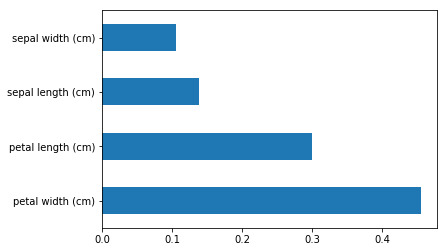

In [35]:
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range

#use inbuilt class feature_importances of tree based classifiers
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(list(dataset.feature_names))
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Columns','Importance']
featureScores.sort_values(['Importance','Columns'],ascending = [False,True])

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dataset.feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
# #get correlations of each features in dataset
# corrmat = data.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Wrapper Methods
Wrapper Methods generate models with a subsets of feature and gauge their model performances.

### Forward Search
This method allows you to search for the best feature w.r.t model performance and add them to your feature subset one after the other.

For data with n features,

->On first round ‘n’ models are created with individual feature and the best predictive feature is selected.

->On second round, ‘n-1’ models are created with each feature and the previously selected feature.

->This is repeated till a best subset of ‘m’ features are selected.

### Recursive Feature Elimination
The Recursive Feature Elimination (RFE) method is a feature selection approach.  This method eliminates worst performing features on a particular model one after the other until the best subset of features are known. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

For data with n features,

->On first round ‘n-1’ models are created with combination of all features except one. The least performing feature is removed

-> On second round ‘n-2’ models are created by removing another feature.

Wrapper Methods promises you a best set of features with a extensive greedy search.

#### Drawbacks of wrapper methods 
The sheer amount of models that needs to be trained. It is computationally very expensive and is infeasible with large number of features.

In [10]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import pandas as pd

In [12]:
# load the iris datasets
dataset = datasets.load_iris()

In [13]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

In [14]:
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset.data, dataset.target)

In [15]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


In [21]:
list(dataset.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']